##Flag Encoding Function

In [1]:
def encode_flag_to_binary(flag):
    """
    Converts a string flag into a binary string representation.

    Args:
    flag (str): The string flag to be converted.

    Returns:
    str: A binary string representation of the flag.
    """
    return ''.join(format(ord(c), '08b') for c in flag)

# Example usage
flag = "ansh0e"
binary_flag = encode_flag_to_binary(flag)
print(f"Binary flag: {binary_flag}")
print(f"Length of binary flag: {len(binary_flag)}")

Binary flag: 011000010110111001110011011010000011000001100101
Length of binary flag: 48


##MODEL CREATION FUNCTION

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_flag_hiding_model(input_shape, binary_flag):
    """
    Creates a simple neural network model with the binary flag encoded in the activation functions.

    Args:
    input_shape (tuple): The shape of the input data (e.g., (64, 64, 3) for 64x64 RGB images).
    binary_flag (str): The binary string representation of the flag.

    Returns:
    tf.keras.Model: The constructed neural network model.
    """
    model = models.Sequential()

    # Input layer to hidden layer 1
    model.add(layers.Flatten(input_shape=input_shape))
    model.add(layers.Dense(128))
    for i in range(128):
        if binary_flag[i % len(binary_flag)] == '1':
            model.add(layers.ReLU())
        else:
            model.add(layers.Activation('sigmoid'))

    # Hidden layer 1 to hidden layer 2
    model.add(layers.Dense(64))
    for i in range(64):
        if binary_flag[(i+128) % len(binary_flag)] == '1':
            model.add(layers.ReLU())
        else:
            model.add(layers.Activation('sigmoid'))

    # Hidden layer 2 to output layer
    model.add(layers.Dense(1))
    model.add(layers.Activation('sigmoid'))  # Output layer with Sigmoid activation for binary classification

    return model


##Data Generators

In [3]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [4]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset
!unzip kaggle-cat-vs-dog-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5489.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/549.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5490.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5491.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5492.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5493.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5494.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5495.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5496.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5497.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5498.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5499.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/55.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/550.jpg  
  inflating: kagglecatsanddogs_3367a/PetImages/Dog/5500.jpg  
  inflating: kagglecats

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset directory
train_dir = 'kagglecatsanddogs_3367a/PetImages'

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,  # Randomly apply shearing transformations
    zoom_range=0.2,   # Randomly zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2   # Reserve 20% of data for validation
)

# Data generator for training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),  # Resize images to match the model's input size
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training'  # Use this subset for training
)

# Data generator for validation data
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use this subset for validation
)


Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


##Training The model

In [6]:
def train_model(model, train_generator, validation_generator, epochs=10):
    """
    Trains the neural network model on the provided data.

    Args:
    model (tf.keras.Model): The neural network model to be trained.
    train_generator (tf.keras.preprocessing.image.ImageDataGenerator): The training data generator.
    validation_generator (tf.keras.preprocessing.image.ImageDataGenerator): The validation data generator.
    epochs (int): The number of epochs to train the model.

    Returns:
    tf.keras.callbacks.History: The training history of the model.
    """
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator
    )

    return history


In [7]:
# Encode the flag
flag = "ansh0eXaquila"
binary_flag = encode_flag_to_binary(flag)

# Create the model
input_shape = (64, 64, 3)
model = create_flag_hiding_model(input_shape, binary_flag)

# Print the model architecture
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 12288)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,572,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_9 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,581,313 (6.03 MB)

 Trainable params: 1,581,313 (6.03 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = train_model(model, train_generator, validation_generator, epochs=10)

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 86s 113ms/step - accuracy: 0.4975 - loss: 0.6946 - val_accuracy: 0.4995 - val_loss: 0.6933
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 66s 105ms/step - accuracy: 0.4948 - loss: 0.6941 - val_accuracy: 0.5005 - val_loss: 0.6932
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 66s 106ms/step - accuracy: 0.5091 - loss: 0.6938 - val_accuracy: 0.4995 - val_loss: 0.6965
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 81s 103ms/step - accuracy: 0.5075 - loss: 0.6933 - val_accuracy: 0.4995 - val_loss: 0.6937
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 66s 104ms/step - accuracy: 0.4933 - loss: 0.6940 - val_accuracy: 0.4995 - val_loss: 0.6933
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 89s 116ms/step - accuracy: 0.5043 - loss: 0.6938 - val_accuracy: 0.4995 - val_loss: 0.6940
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.5021 - loss: 0.6947 - val_accuracy: 0.4995 - val_loss: 0.6949
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 66s 104ms/step - accuracy: 0.5104 - loss: 0

In [11]:
# Evaluate the model on the validation set
validation_loss, validation_accuracy = model.evaluate(validation_generator)

print(f"Validation Loss: {validation_loss}")
print(f"Validation Accuracy: {validation_accuracy}")


156/156 ━━━━━━━━━━━━━━━━━━━━ 13s 82ms/step - accuracy: 0.4950 - loss: 0.6934
Validation Loss: 0.693234384059906
Validation Accuracy: 0.5005009174346924


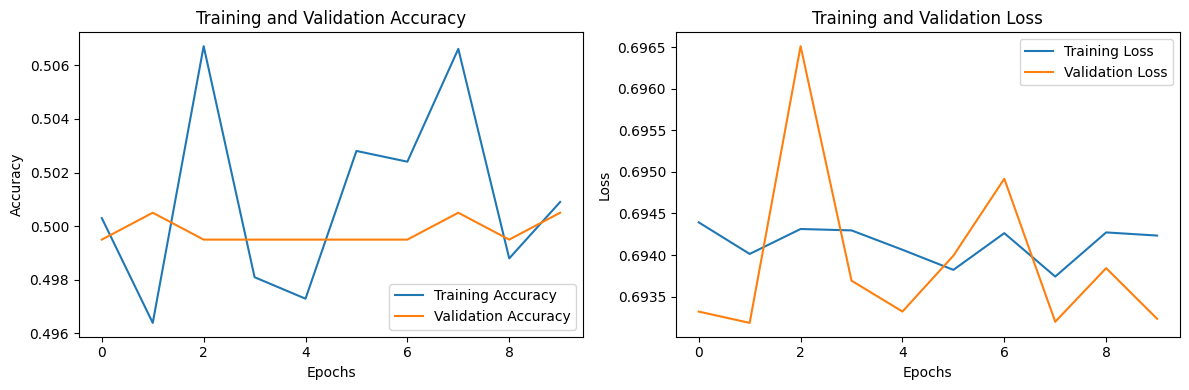

In [12]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plots the training and validation accuracy and loss.

    Args:
    history (tf.keras.callbacks.History): The history object returned by the model's fit method.
    """
    # Extract values from the history object
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage
plot_training_history(history)


In [14]:

model.save('my_model.keras')
